# Table of Contents

1. [Pollution Trends & Patterns](##pollution-trends--patterns)
2. [Spatial Analysis](#spatial-analysis)
3. [Data Quality & Reporting](#data-quality--reporting)
4. [Monitoring & Policy Insights](#monitoring--policy-insights)
5. [Public Impact & Reporting](#public-impact--reporting)

# 1. Introduction
- What is the dataset about?
- Why is this analysis important for public health and policy?
- What are the goals of this notebook?

## Data Dictionary: Key Pollutants

| Column Name | Full Form | Description | Health Impact |
|-------------|------------|-------------|----------------|
| **PM2.5** | Particulate Matter ≤ 2.5 microns | Fine airborne particles from combustion, dust, and smoke. Can penetrate deep into lungs. | Linked to heart disease, stroke, and respiratory issues |
| **PM10** | Particulate Matter ≤ 10 microns | Larger particles like dust, pollen, and mold. Suspended in air. | Causes respiratory irritation and worsens asthma |
| **NO₂** | Nitrogen Dioxide | Emitted from vehicles and industrial processes. Contributes to smog. | Irritates lungs and increases risk of infections |
| **SO₂** | Sulfur Dioxide | Produced by burning coal and oil. Can form acid rain. | Triggers asthma and other respiratory problems |
| **CO** | Carbon Monoxide | Colorless gas from incomplete combustion. Highly toxic in enclosed spaces. | Reduces oxygen delivery in body; can be fatal at high levels |
| **O₃** | Ozone (Ground-level) | Formed by sunlight reacting with pollutants. Not emitted directly. | Causes chest pain, coughing, and worsens lung diseases |


## Notebook Setup

In [343]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [88]:
import os
os.listdir(os.getcwd())

['.git',
 '.ipynb_checkpoints',
 'Air_Quality_India_EDA.ipynb',
 'Analysis of AQI India.ipynb',
 'AQI_India.html',
 'AQI_raw_data.csv',
 'data.csv',
 'SimpleMaps India Cities Database.csv']

In [89]:
try:
    data = pd.read_csv("data.csv")
except Exception as e:
    print(e)

'utf-8' codec can't decode byte 0x96 in position 162365: invalid start byte


In [90]:
B = "\033[1m"
R = "\033[0m"

In [91]:
import chardet

dataset = "data.csv"
with open(dataset, 'rb') as f:
    result = chardet.detect(f.read(100000))
    print(f"The dataset {B}{dataset}{R} is found to have encoding : {B}{result['encoding']}{R} with confidence : {B}{result['confidence']}{R}.")

data = pd.read_csv(dataset, encoding = result['encoding'], encoding_errors = 'ignore')

The dataset data.csv is found to have encoding : ascii with confidence : 1.0.


## Analysing the Data

In [92]:
data.head(2)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [94]:
print(f"{B}Details of missing/null values - {R}")
data.isnull().sum()

Details of missing/null values - 


stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

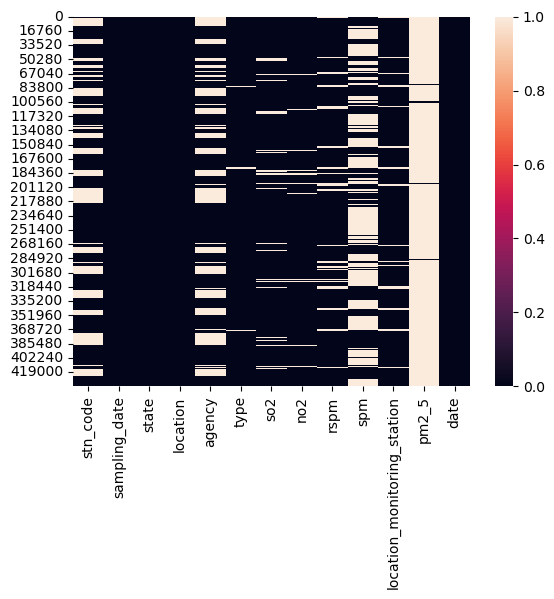

In [95]:
sns.heatmap(data.isnull())
plt.show()

## Data Preprocessing

In [96]:
data['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 435742 entries, 0 to 435741
Series name: date
Non-Null Count   Dtype 
--------------   ----- 
435735 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


In [97]:
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

data["Month"] = data['date'].dt.month
data["Year"] = data['date'].dt.year

In [98]:
data['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 435742 entries, 0 to 435741
Series name: date
Non-Null Count   Dtype         
--------------   -----         
435735 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.3 MB


**Adding Season**

In [99]:
def season(month):
    if month in [3, 4, 5]: return "Summer"
    elif month in [6, 7, 8]: return "Monsoon"
    elif month in [9, 10, 11]: return "Post Monsoon"
    else: return "Winter"

data["Season"] = data['Month'].apply(season)

### Focusing on missing values

In [135]:
def count_null_percentage(data, threshold):
    null_percentage = round(data.isnull().mean() * 100, 2)
    null_percentage = null_percentage[null_percentage > 0].sort_values(ascending = False)
    print("\nMissing values in the dataset -\n\n")
    for feature, null_count in null_percentage.items():
        if null_count > threshold:
            print(f"{B}{feature:<30}{R} : {B}{null_count} %{R}\n----------------------------------------")
        else:
            print(f"{feature:<30} : {null_count} %\n----------------------------------------")

In [136]:
count_null_percentage(data, 10)


Missing values in the dataset -


pm2_5                          : 97.86 %
----------------------------------------
spm                            : 54.48 %
----------------------------------------
agency                         : 34.3 %
----------------------------------------
stn_code                       : 33.06 %
----------------------------------------
location_monitoring_station    : 6.31 %
----------------------------------------
type                           : 1.24 %
----------------------------------------


As we can see the missing data of the features `pm2.5` and `spm` are too sparse. In this case using it for visualization can be misleading. But we also need to check if the captured data are from selected locations, which will tell us if they were intentionally collected from a list of locations. In this case dropping and ignoring these features would be wrong. Or if the missingness is random then we may choose to exclude this data.

However it is safe to impute `rspm`, `so2` and `no2`. But we need to **Understand the Nature of Missingness**, then ask:
- Is missingness random or clustered by city, season, or area type?
- Are certain cities or months more affected?

If missingness is not random, global mean/median may distort patterns.


In [101]:
data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date', 'Month', 'Year', 'Season'],
      dtype='object')

In [102]:
temp_df = data[['location', 'state', 'date', 'so2', 'no2', 'rspm', 'Season']].copy()

### Experimenting on the Imputation Methods

In [103]:
def impute_and_insert(df, features, group_keys, methods):
    for feature in features:
        for group_key in group_keys:
            for method in methods:
                # Build column name
                col_name = f"{feature}_imputed_{method.upper()}_by{group_key.capitalize()}"
                
                # Compute imputed values
                imputed_series = df[feature].fillna(
                    df.groupby(group_key)[feature].transform(method)
                )
                
                # Insert after original column
                insert_pos = df.columns.get_loc(feature) + 1
                df.insert(insert_pos, col_name, imputed_series)

In [104]:
features = ['so2', 'no2', 'rspm']
group_keys = ['location', 'state', 'Season']
methods = ['mean', 'median']

impute_and_insert(temp_df, features, group_keys, methods)

In [105]:
temp_df.drop(columns = ['date']).describe().T

,count,mean,std,min,25%,50%,75%,max
so2,401096.0,10.829414,11.177187,0.0,5.0,8.0,13.700000,909.000000
so2_imputed_MEDIAN_bySeason,435742.0,10.602993,10.751732,0.0,5.0,8.0,13.000000,909.000000
so2_imputed_MEAN_bySeason,435742.0,10.827363,10.724553,0.0,5.0,9.0,13.000000,909.000000
so2_imputed_MEDIAN_byState,435739.0,10.463206,10.886792,0.0,4.4,8.0,13.000000,909.000000
so2_imputed_MEAN_byState,435739.0,10.589141,10.863679,0.0,4.8,8.0,13.000000,909.000000
so2_imputed_MEDIAN_byLocation,435651.0,10.405957,10.922852,0.0,4.3,7.7,13.000000,909.000000
so2_imputed_MEAN_byLocation,435651.0,10.478851,10.904336,0.0,4.4,7.9,13.000000,909.000000
no2,419509.0,25.809623,18.503086,0.0,14.0,22.0,32.200000,876.000000
no2_imputed_MEDIAN_bySeason,435742.0,25.661053,18.171473,0.0,14.0,22.0,32.000000,876.000000
no2_imputed_MEAN_bySeason,435742.0,25.806194,18.157307,0.0,14.0,22.3,32.000000,876.000000


### How are we comparing the scores?

**`Score = Total Deviation from Original`**

For each imputed column (e.g., so2_imputed_MEDIAN_bySeason), we compare it to the original column (so2) using three metrics:

1. Mean Difference
`mean_diff = abs(imputed_mean - original_mean)`

This tells us how much the central tendency has shifted.

2. Standard Deviation Difference
`std_diff = abs(imputed_std - original_std)`

This shows whether the spread of values has changed — important for preserving variability.

3. Median Difference
`median_diff = abs(imputed_median - original_median)`

This checks if the core of the distribution (50th percentile) is still aligned.

Final Score
`score = mean_diff + std_diff + median_diff`

**`Lower score = better preservation of original distribution.`**

Why This Works
- It’s interpretable, you can see exactly how much each method deviates.


In [106]:
def compare_imputation_strategies(summary_df):
    # Identify original features
    originals = ['so2', 'no2', 'rspm']
    strategies = ['MEDIAN_bySeason', 'MEAN_bySeason',
                  'MEDIAN_byState', 'MEAN_byState',
                  'MEDIAN_byLocation', 'MEAN_byLocation']
    results = []
    for feature in originals:
        original_stats = summary_df.loc[feature]
        for strategy in strategies:
            col_name = f"{feature}_imputed_{strategy}"
            if col_name not in summary_df.index:
                continue
            imputed_stats = summary_df.loc[col_name]
            # Calculate absolute differences
            mean_diff = abs(imputed_stats['mean'] - original_stats['mean'])
            std_diff = abs(imputed_stats['std'] - original_stats['std'])
            median_diff = abs(imputed_stats['50%'] - original_stats['50%'])
            results.append({
                'Feature': feature,
                'Strategy': strategy,
                'Mean_Diff': round(mean_diff, 3),
                'Std_Diff': round(std_diff, 3),
                'Median_Diff': round(median_diff, 3)
            })
    # Convert to DataFrame
    result_df = pd.DataFrame(results)
    # Rank by closeness to original (lower is better)
    result_df['Score'] = result_df[['Mean_Diff', 'Std_Diff', 'Median_Diff']].sum(axis=1)
    result_df = result_df.sort_values(by=['Feature', 'Score'], ascending = True)

    return result_df

In [107]:
comparison = compare_imputation_strategies(temp_df.drop(columns = ['date']).describe().T)
print(comparison)

   Feature           Strategy  Mean_Diff  Std_Diff  Median_Diff  Score
6      no2    MEDIAN_bySeason      0.149     0.332          0.0  0.481
9      no2       MEAN_byState      0.146     0.232          0.2  0.578
7      no2      MEAN_bySeason      0.003     0.346          0.3  0.649
11     no2    MEAN_byLocation      0.207     0.187          0.3  0.694
10     no2  MEDIAN_byLocation      0.272     0.179          0.3  0.751
8      no2     MEDIAN_byState      0.202     0.232          0.4  0.834
14    rspm     MEDIAN_byState      0.255     2.454          0.0  2.709
16    rspm  MEDIAN_byLocation      0.311     1.885          1.0  3.196
12    rspm    MEDIAN_bySeason      1.705     3.274          0.0  4.979
17    rspm    MEAN_byLocation      1.116     1.796          3.0  5.912
15    rspm       MEAN_byState      0.848     2.353          3.0  6.201
13    rspm      MEAN_bySeason      0.021     3.468          4.0  7.489
3      so2       MEAN_byState      0.240     0.314          0.0  0.554
0     

We always choose the strategy with the least score, because it means the imputed values are closest to the original distribution in terms of mean, standard deviation, and median. **Lower = better fit.**

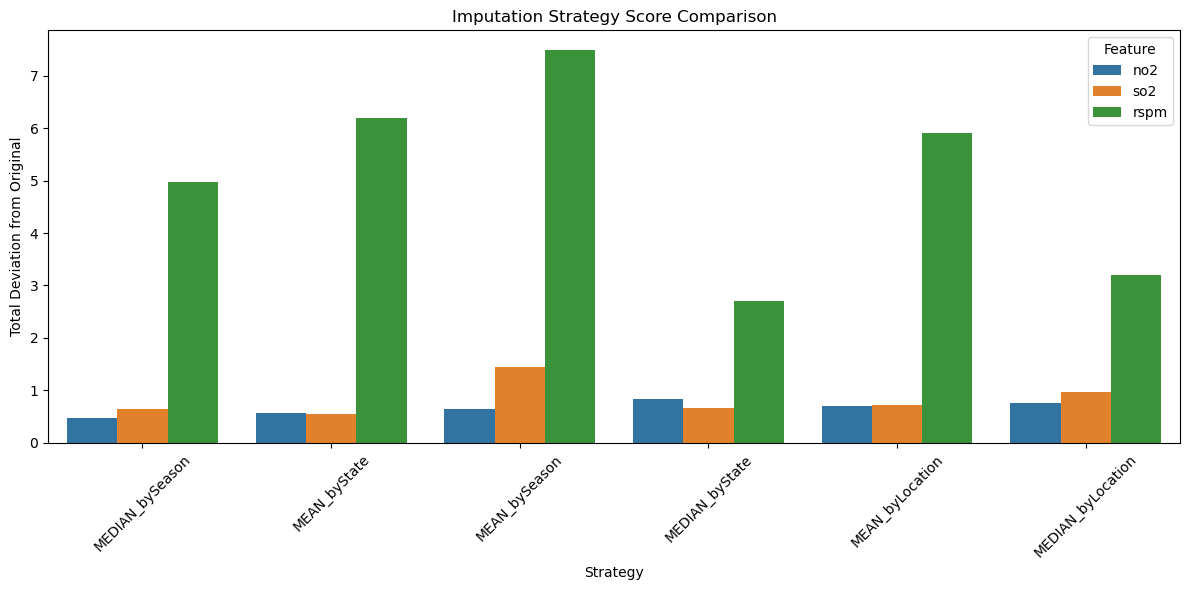

In [108]:
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison.sort_values(by = 'Score',ascending = True), x='Strategy', y='Score', hue='Feature')
plt.xticks(rotation=45)
plt.title("Imputation Strategy Score Comparison")
plt.ylabel("Total Deviation from Original")
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

It can be observed that **Season-wise median imputation** best preserves original mean, median, and spread across SO₂, NO₂, and RSPM. It minimizes distortion, handles outliers well and aligns with seasonal pollution patterns.


In [109]:
data['so2'] = data['so2'].fillna(data.groupby('Season')['so2'].transform('median'))
data['no2'] = data['no2'].fillna(data.groupby('Season')['no2'].transform('median'))
data['rspm'] = data['rspm'].fillna(data.groupby('Season')['rspm'].transform('median'))

In [110]:
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                                 0
no2                                 0
rspm                                0
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
Month                               7
Year                                7
Season                              0
dtype: int64

In [115]:
print(f"Missing values in Date     : {B}{data['date'].isnull().sum()}{R}")
print(f"Missing values in Location : {B}{data['location'].isnull().sum()}{R}")
print(f"Missing values in State    : {B}{data['state'].isnull().sum()}{R}")
print(f"\nShape of Dataset           : {B}{data.shape}{R}")

Missing values in Date     : 7
Missing values in Location : 3
Missing values in State    : 0

Shape of Dataset           : (435742, 16)


Found **7 missing values in `date`** and **3 missing values in `location`**. Since these fields are critical for temporal and spatial analysis, and their values cannot be reliably inferred, imputing them may introduce misleading patterns in visualizations or aggregations.

Given the small count, we choose to **drop these rows**. This decision ensures data integrity and does not significantly affect the overall distribution.

In [117]:
data.dropna(subset = ['date', 'location'], inplace = True)
print(f"\nShape of Dataset           : {B}{data.shape}{R}")


Shape of Dataset           : (435735, 16)


### Moving attention towards other missing data

In [137]:
count_null_percentage(data, 10)


Missing values in the dataset -


pm2_5                          : 97.86 %
----------------------------------------
spm                            : 54.48 %
----------------------------------------
agency                         : 34.3 %
----------------------------------------
stn_code                       : 33.06 %
----------------------------------------
location_monitoring_station    : 6.31 %
----------------------------------------
type                           : 1.24 %
----------------------------------------


We have these remaining missing values which we can handle in the following ways:

| Feature                      | Missing Count | Type    | Treatment   | Justification                                                                 |
|-----------------------------|----------------|---------|-------------|--------------------------------------------------------------------------------|
| `stn_code`                  | 144,074        | object  | `"No Data"` | Structural code; not used in analysis, safe to label                          |
| `agency`                    | 149,478        | object  | `"Unknown"` | Descriptive metadata; labeling preserves rows without misleading analysis      |
| `type`                      | 5,390          | object  | `"Unknown"` | Low missingness; labeling avoids distortion                                    |
| `location_monitoring_station` | 27,488      | object  | `"Unknown"` | Reference field; not analytical, safe to label                                |
| `spm`                       | 237,380        | numeric | Skip      | High missingness; imputation may distort pollution patterns                    |
| `pm2_5`                     | 426,421        | numeric | Skip      | Extremely sparse; not suitable for imputation or reliable analysis             |

In [138]:
data['stn_code'] = data['stn_code'].fillna('No Data')
data['agency'] = data['agency'].fillna('Unknown')
data['type'] = data['type'].fillna('Unknown')
data['location_monitoring_station'] = data['location_monitoring_station'].fillna('Unknown')

In [139]:
data.head(5)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,Month,Year,Season
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,Unknown,"Residential, Rural and other Areas",4.8,17.4,103.0,NaN,Unknown,NaN,1990-02-01,2.0,1990.0,Winter
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,Unknown,Industrial Area,3.1,7.0,103.0,NaN,Unknown,NaN,1990-02-01,2.0,1990.0,Winter
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,Unknown,"Residential, Rural and other Areas",6.2,28.5,103.0,NaN,Unknown,NaN,1990-02-01,2.0,1990.0,Winter
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,Unknown,"Residential, Rural and other Areas",6.3,14.7,94.0,NaN,Unknown,NaN,1990-03-01,3.0,1990.0,Summer
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,Unknown,Industrial Area,4.7,7.5,94.0,NaN,Unknown,NaN,1990-03-01,3.0,1990.0,Summer


Renaming the column headers as:

`std_code` : **Station Code**

`sampling_date` : **Sampling Date**

`state` : **State**

`location` : **City**

`agency` : **Agency**

`type` : **Area Category**

`so2` : **Sulphur Dioxide**

`no2` : **Nitrogen Dioxide**

`rspm` : **Respirable Suspended Particulate Matter**

`spm` : **Suspended Particulate Matter**

In [140]:
data = data.rename(
    columns = {
        'stn_code'      : 'Station_Code',
        'sampling_date' : 'Sampling_Date',
        'state'         : 'State',
        'location'      : 'City',
        'agency'        : 'Agency',
        'type'          : 'Area_Category',
        'so2'           : 'Sulphur_Dioxide',
        'no2'           : 'Nitrogen_Dioxide',
        'rspm'          : 'Respirable_Suspended_Particulate_Matter',
        'spm'           : 'Suspended_Particulate_Matter',
        'location_monitoring_station' : 'Location_Monitoring_Station',
        'pm2_5'         : 'PM2.5',
        'date'          : 'Date'
    }
)

### Pollution Index

Excluded PM2.5 and SPM due to high missingness (97.86% and 54.48% respectively). The index is based on pollutants with reliable coverage: RSPM (PM10), NO₂ and SO₂.

**Pollution_Index = (0.45 × RSPM) + (0.35 × NO₂) + (0.20 × SO₂)**

Where:
- **RSPM** = Respirable Suspended Particulate Matter (PM10)
- **NO₂** = Nitrogen Dioxide
- **SO₂** = Sulphur Dioxide

Weights are derived from WHO and CPCB standards, reflecting relative health impact and data availability.

In [223]:
weights_main = {
    'Respirable_Suspended_Particulate_Matter': 0.45,
    'Nitrogen_Dioxide': 0.35,
    'Sulphur_Dioxide': 0.20
}

data['Pollution_Index'] = (
    data['Respirable_Suspended_Particulate_Matter'] * weights_main['Respirable_Suspended_Particulate_Matter'] +
    data['Nitrogen_Dioxide'] * weights_main['Nitrogen_Dioxide'] +
    data['Sulphur_Dioxide'] * weights_main['Sulphur_Dioxide']
)

In [224]:
data.columns

Index(['Station_Code', 'Sampling_Date', 'State', 'City', 'Agency',
       'Area_Category', 'Sulphur_Dioxide', 'Nitrogen_Dioxide',
       'Respirable_Suspended_Particulate_Matter',
       'Suspended_Particulate_Matter', 'Location_Monitoring_Station', 'PM2.5',
       'Date', 'Month', 'Year', 'Season', 'Pollution_Index'],
      dtype='object')

# Pollution Trends & Patterns

## How have SO₂, NO₂, and PM2.5 levels changed over time across India?

In [142]:
pollutants = ['Sulphur_Dioxide', 'Nitrogen_Dioxide', 'PM2.5']


The Data ranges from 1987 to 2015.

SO₂ data available from    :1987 to 2015.
NO₂ data available from    :1987 to 2015.
PM2.5 data available from  :2014 to 2015.




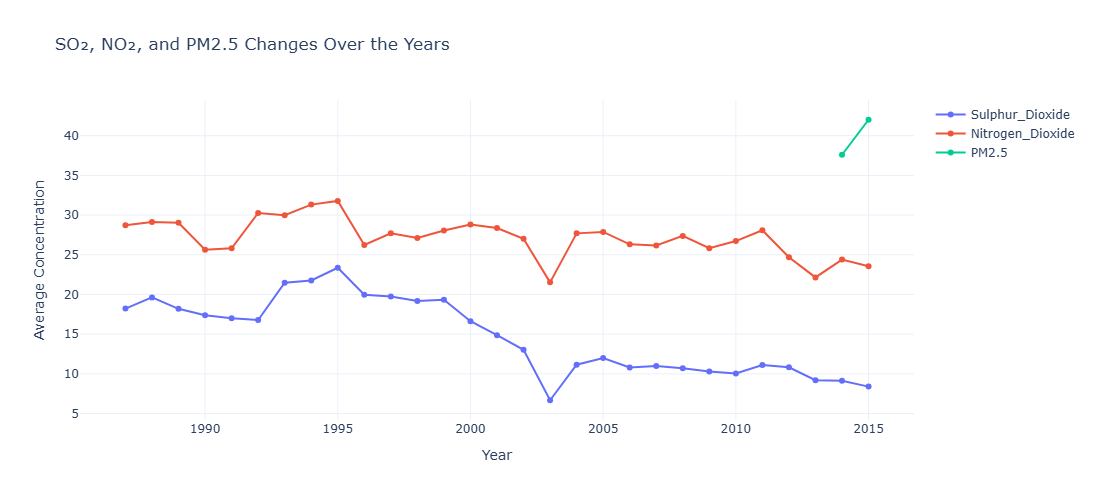

In [191]:
print(f"\nThe Data ranges from {B}{int(data['Year'].min())}{R} to {B}{int(data['Year'].max())}{R}.\n")

print(f"SO₂ data available from    :{B}{int(data.loc[data['Sulphur_Dioxide'] > 0, 'Year'].min())}{R} to " + 
                                f"{B}{int(data.loc[data['Sulphur_Dioxide'] > 0, 'Year'].max())}{R}.")
print(f"NO₂ data available from    :{B}{int(data.loc[data['Nitrogen_Dioxide'] > 0, 'Year'].min())}{R} to " + 
                                f"{B}{int(data.loc[data['Nitrogen_Dioxide'] > 0, 'Year'].max())}{R}.")
print(f"PM2.5 data available from  :{B}{int(data.loc[data['PM2.5'] > 0, 'Year'].min())}{R} to " + 
                                f"{B}{int(data.loc[data['PM2.5'] > 0, 'Year'].max())}{R}.\n\n")



fig = go.Figure()

for pollutant in pollutants:
    yearly_avg = data.groupby('Year')[pollutant].mean()
    fig.add_trace(go.Scatter(
        x=yearly_avg.index,
        y=yearly_avg.values,
        mode='lines+markers',
        name=pollutant,
        hovertemplate=f"{pollutant}<br>Year: %{{x}}<br>Avg: %{{y:.2f}}"
    ))

fig.update_layout(
    title="SO₂, NO₂, and PM2.5 Changes Over the Years",
    xaxis_title="Year",
    yaxis_title="Average Concentration",
    hovermode="x unified",
    template="plotly_white",
    width=900,
    height=500
)

fig.show()


**Insights :**

- The average levels of SO₂ and NO₂ show a gradual downward trend from 1995 to 2015, indicating long-term improvement in air quality.
- A noticeable dip in pollutant levels is observed around 2003, possibly linked to early regulatory efforts.
- PM2.5 measurements begin in 2014, marking a shift toward finer particulate monitoring in India’s pollution tracking framework.

## Are there seasonal spikes in pollution?

In [187]:
pollutants = ['Sulphur_Dioxide', 'Nitrogen_Dioxide', 'PM2.5']
seasons = ['Winter', 'Summer', 'Monsoon', 'Post Monsoon']

# Group by Year and Season, then calculate mean for each pollutant
grouped = data.groupby(['Year', 'Season'])[pollutants].mean().reset_index()

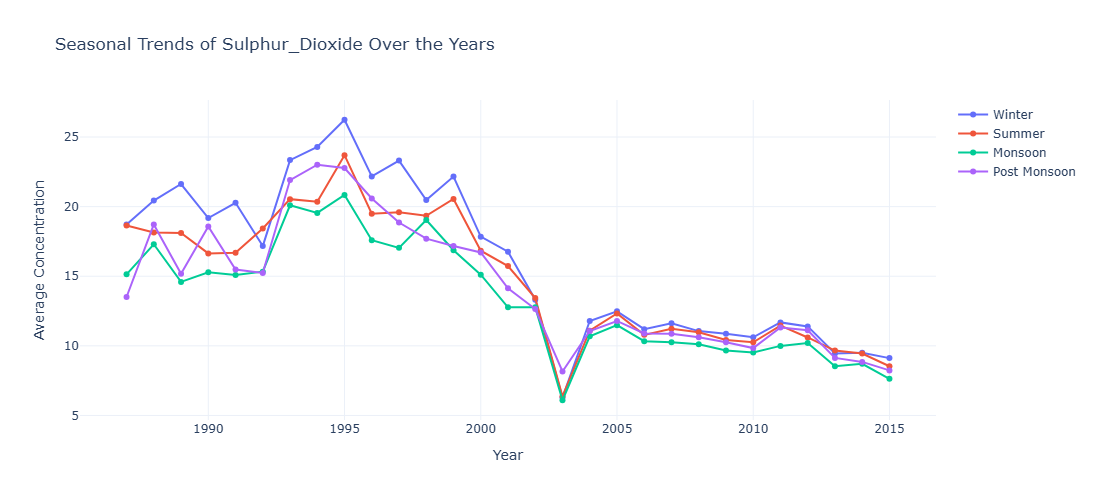

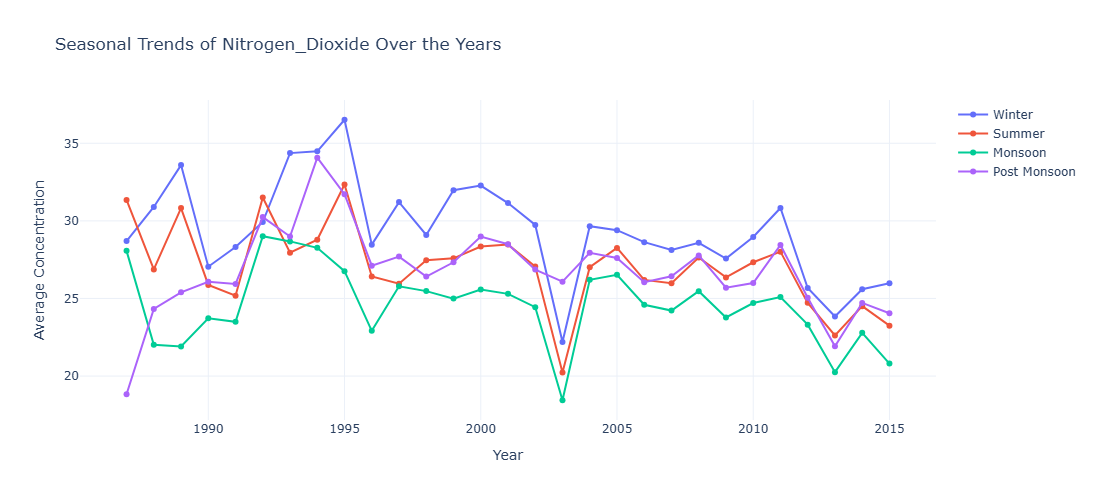

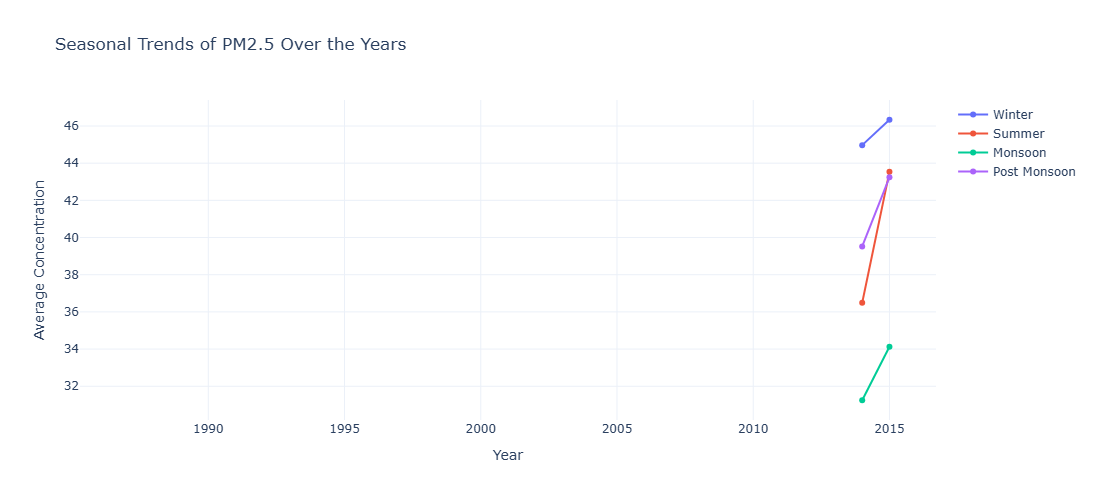

In [189]:
for pollutant in pollutants:
    fig = go.Figure()
    
    for season in seasons:
        subset = grouped[grouped['Season'] == season]
        fig.add_trace(go.Scatter(
            x=subset['Year'],
            y=subset[pollutant],
            mode='lines+markers',
            name=season,
            hovertemplate=f"{pollutant} ({season})<br>Year: %{{x}}<br>Avg: %{{y:.2f}}"
        ))
    
    fig.update_layout(
        title=f"Seasonal Trends of {pollutant} Over the Years",
        xaxis_title="Year",
        yaxis_title="Average Concentration",
        hovermode="x unified",
        template="plotly_white",
        width=900,
        height=500
    )
    
    fig.show()


**Insights :**

 - o
 - o
 - o
 - o
 - o

## Which cities or states show the highest average pollutant levels?

In [252]:
result = data.groupby('City')[
            [
                'Sulphur_Dioxide', 'Nitrogen_Dioxide', 'Respirable_Suspended_Particulate_Matter', 'Suspended_Particulate_Matter', 'PM2.5',
                'Pollution_Index'
            ]
        ].mean().sort_values(by = 'Pollution_Index', ascending = False)

In [296]:
print(f"\nTotal Cities : {B}{data['City'].nunique()}{R}")

n = 10     # Number of records to fetch ..

if n > data['City'].nunique():
    n = data['City'].nunique()
    
highest_n = result.index[0:n]
lowest_n = result.index[len(result) - (n+1):-1]

i = 1
print(f"\nTop {n} Cities with highest average pollutant -\n")
for city in highest_n:
    print(f"\t\t{i:<2} - {B}{city}{R}")
    i += 1
i = 1
print(f"\nTop {5} Cities with lowest average pollutant -\n")
for city in lowest_n:
    print(f"\t\t{i:<2} - {B}{city}{R}")
    i += 1


Total Cities : 304

Top 10 Cities with highest average pollutant -

		1  - West Singhbhum
		2  - Ghaziabad
		3  - Bareilly
		4  - Allahabad
		5  - Ludhiana
		6  - Khanna
		7  - Mathura
		8  - Jharia
		9  - Raipur
		10 - Gobindgarh

Top 5 Cities with lowest average pollutant -

		1  - Tura
		2  - Karaikal
		3  - Alappuzha
		4  - Dharamshala
		5  - Khliehriat
		6  - Chitradurga
		7  - Malappuram
		8  - Wayanad
		9  - Kolasib
		10 - Pathanamthitta


In [302]:
def plot_n_polluted(subset, type = "most"):
    if type == "most":
        type_ = 'Reds'
    elif type == "least":
        type_ = 'Greens'
    else:
        type_ = 'winter'
    x_labels = subset.index.astype(str)
    y_values = subset['Pollution_Index'].values
    
    fig = go.Figure(go.Bar(
        x=x_labels,
        y=y_values,
        text=[f"{val:.2f}" for val in y_values],
        textposition='outside',
        marker=dict(color=y_values, colorscale = type_),
        hovertemplate="City: %{x}<br>Pollution Index: %{y:.2f}<extra></extra>"
    ))
    
    fig.update_layout(
        title = f"Pollution Index by City - Top {n} {type} Polluted Cities",
        xaxis_title="City",
        yaxis_title="Pollution Index",
        yaxis=dict(tickformat=".2f"),
        template="plotly_white",
        width=900,
        height=500
    )
    
    fig.show()

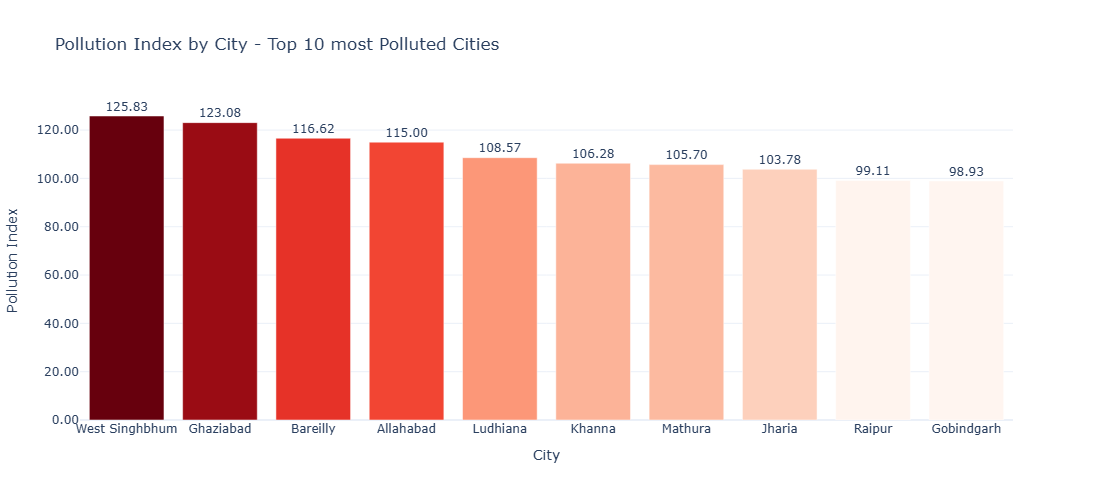

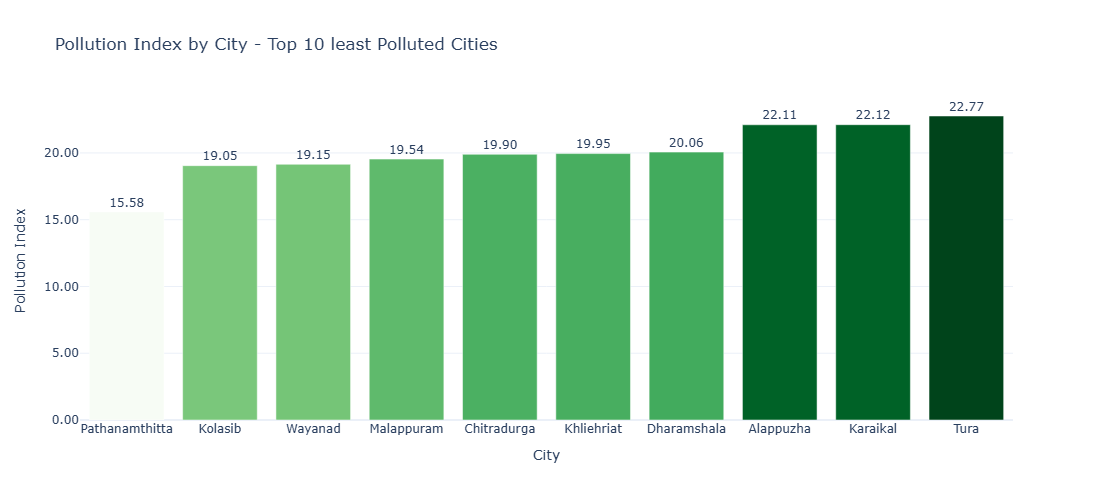

In [301]:
subset_1 = result.iloc[0:n]
plot_n_polluted(subset_1, "most")

subset_2 = result.iloc[len(result) - (n+1):-1]
plot_n_polluted(subset_2[::-1], "least")

**Insights :**

 - o

## How do pollution levels differ in industrial vs residential areas?

In [313]:
print("Number of Records for -\n")
for area in data.Area_Category.unique():
    print(f"\t\t{B}{area:<35}{R} : {B}{len(data[data['Area_Category'] == area])}{R}")

Number of Records for -

		Residential, Rural and other Areas  : 179013
		Industrial Area                     : 96089
		Unknown                             : 5390
		Sensitive Area                      : 8979
		Industrial Areas                    : 51747
		Residential and others              : 86791
		Sensitive Areas                     : 5536
		Industrial                          : 233
		Residential                         : 158
		RIRUO                               : 1304
		Sensitive                           : 495


In [340]:
areas_df = data.copy()

area_mapping = {
    'Residential, Rural and other Areas' : 'Residential',
    'Residential and others'             : 'Residential',
    'Residential'                        : 'Residential',

    'Industrial Area'                    : 'Industrial',
    'Industrial Areas'                   : 'Industrial',
    'Industrial'                         : 'Industrial'
}

areas_df['Area_Category'] = areas_df['Area_Category'].replace(area_mapping)

In [329]:
print("Number of Records for -\n")
print(f"\t\t{B}Residential{"":<5}{R} : {B}{len(areas_df[areas_df['Area_Category'] == 'Residential'])}{R}")
print(f"\t\t{B}Industrial {"":<5}{R} : {B}{len(areas_df[areas_df['Area_Category'] == 'Industrial'])}{R}")

Number of Records for -

		Residential      : 265962
		Industrial       : 148069


In [330]:
pollutants = ['Sulphur_Dioxide', 'Nitrogen_Dioxide', 'Respirable_Suspended_Particulate_Matter', 'Suspended_Particulate_Matter', 'PM2.5',
                'Pollution_Index']
areas = ['Residential', 'Industrial']

# Group by Year and Season, then calculate mean for each pollutant
grouped = areas_df.groupby(['Year', 'Area_Category'])[pollutants].mean().reset_index()

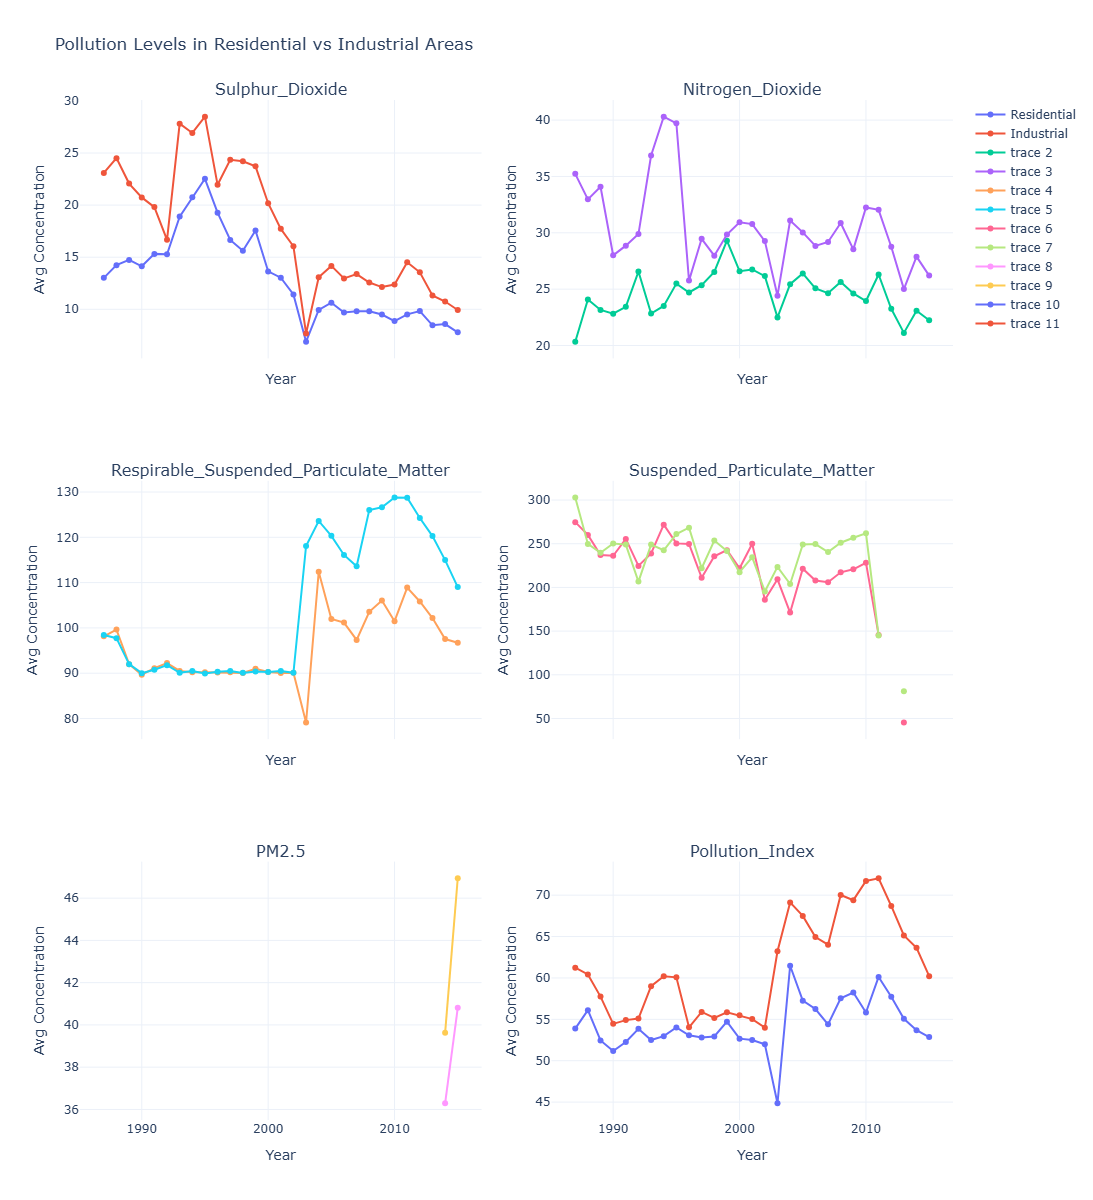

In [350]:
# Create a 3x2 subplot grid
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=pollutants,
    shared_xaxes=True,
    vertical_spacing=0.12,
    horizontal_spacing=0.08
)

# Map each pollutant to a subplot position
positions = [(1, 1), (1, 2), (2, 1), (2, 2), (3, 1), (3, 2)]

for i, pollutant in enumerate(pollutants):
    row, col = positions[i]
    
    for area in areas:
        subset = grouped[grouped['Area_Category'] == area]
        fig.add_trace(go.Scatter(
            x=subset['Year'],
            y=subset[pollutant],
            mode='lines+markers',
            name=area if i == 0 else None,  # Show legend only once
            hovertemplate=f"{pollutant} ({area})<br>Year: %{{x}}<br>Avg: %{{y:.2f}}"
        ), row=row, col=col)

# Final layout tweaks
fig.update_layout(
    title_text="Pollution Levels in Residential vs Industrial Areas",
    height=1200,
    width=1000,
    template="plotly_white",
    showlegend=True
)

fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Avg Concentration")

fig.show()


In [341]:
del areas_df

**Insights :**
  
  - o

## Do monitoring stations within a city show consistent readings?

In [355]:
data.Location_Monitoring_Station.nunique()

992

In [356]:
data.Station_Code.nunique()

804

# Table of Contents

1. Introduction
2. Data Cleaning & Exploration
3. Pollution Trends & Patterns
4. Spatial Analysis
5. Monitoring & Policy Insights
6. Data Quality Dashboard
7. Time Series Highlights
8. Public Impact & Reporting
9. Portfolio-Ready Questions